In [1]:
import os
import sys
import urllib.request
import zipfile
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.neural_network
import sklearn.metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib
import sklearn.model_selection
import sklearn.linear_model
import sklearn.neural_network
import sklearn.metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

matplotlib.rcParams['figure.figsize'] = (12, 10)
import warnings
warnings.filterwarnings('ignore')



In [2]:
median_household = "MedianHouseholdIncome2015.csv"
below_poverty_level = "PercentagePeopleBelowPovertyLevel.csv"
completed_highschool = "PercentOver25CompletedHighSchool.csv"
police_killings = "PoliceKillingsUS.csv"
city_share_race = "ShareRaceByCity.csv"

median_household = pd.read_csv(
    median_household, sep=",")
below_poverty_level = pd.read_csv(
    below_poverty_level, sep=",")
completed_highschool = pd.read_csv(
    completed_highschool, sep=",")
police_killings = pd.read_csv(
    police_killings, sep=",")
city_share_race = pd.read_csv(
    city_share_race, sep=",")

police_killings = police_killings.rename(
    columns={'state': 'Geographic Area'})
city_share_race = city_share_race.rename(
    columns={'Geographic area': 'Geographic Area'})

completed_highschool["percent_completed_hs"] = completed_highschool[
    "percent_completed_hs"][completed_highschool["percent_completed_hs"] != '-'].astype('float32')

median_household["Median Income"] = median_household[
    "Median Income"][median_household["Median Income"] != '(X)']
median_household["Median Income"] = median_household[
    "Median Income"][median_household["Median Income"] != '-']
median_household["Median Income"] = median_household[
    "Median Income"][median_household["Median Income"] != '2,500-']
median_household["Median Income"] = median_household[
    "Median Income"][median_household["Median Income"] != '250,000+'].astype('float32')

city_share_race[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]] = city_share_race[[
    "share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]][city_share_race[[
        "share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]] != '(X)'].astype('float32')

below_poverty_level["poverty_rate"] = below_poverty_level[
    "poverty_rate"][below_poverty_level["poverty_rate"] != '-'].astype('float32')

city_share_race = city_share_race.groupby(
    'Geographic Area').mean()
completed_highschool = completed_highschool.groupby(
    'Geographic Area').mean()
median_household = median_household.groupby(
    'Geographic Area').mean()
below_poverty_level = below_poverty_level.groupby(
    'Geographic Area').mean()

X = pd.merge(median_household, completed_highschool,
                on=["Geographic Area"])
X = pd.merge(X, below_poverty_level, on=["Geographic Area"])
X = pd.merge(X, city_share_race, on=["Geographic Area"])
X = pd.merge(X, police_killings, on=["Geographic Area"])
X = X.dropna()
data = X
targets = X["race"]
X

,Geographic Area,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,id,...,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera
0,AK,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,131,...,shot,gun,33.0,M,W,Anchorage,False,attack,Car,False
1,AK,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,836,...,shot,gun,19.0,M,N,Fairbanks,False,attack,Not fleeing,False
2,AK,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,816,...,shot,gun,33.0,M,N,Fairbanks,False,attack,Car,False
3,AK,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,953,...,shot,undetermined,49.0,M,W,Kenai Peninsula,False,attack,Not fleeing,False
4,AK,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,1166,...,shot,knife,49.0,M,N,Spenard,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,WY,60874.992188,92.10054,9.887700,92.373764,0.399505,3.095050,0.389604,6.017822,656,...,shot,gun,23.0,M,N,Cheyenne,False,attack,Not fleeing,False
2530,WY,60874.992188,92.10054,9.887700,92.373764,0.399505,3.095050,0.389604,6.017822,672,...,shot,toy weapon,47.0,M,W,Douglas,False,attack,Not fleeing,False
2531,WY,60874.992188,92.10054,9.887700,92.373764,0.399505,3.095050,0.389604,6.017822,1065,...,shot,knife,48.0,M,W,Laramie,True,other,Not fleeing,False
2533,WY,60874.992188,92.10054,9.887700,92.373764,0.399505,3.095050,0.389604,6.017822,1642,...,shot,gun,50.0,M,W,Casper,True,attack,Not fleeing,False


In [3]:


X["race"] = X["race"].map({x: i for x, i in zip(
    X["race"].unique(), range(X["race"].unique().shape[0]))})

y = X["race"]
X["gender"] = X["gender"].map({x: i for x, i in zip(
    X["gender"].unique(), range(X["gender"].unique().shape[0]))})
X["signs_of_mental_illness"] = X["signs_of_mental_illness"].map({
                                                                False: 0, True: 1})
X["body_camera"] = X["body_camera"].map({False: 0, True: 1})
X["armed"] = X["armed"].map({x: i for x, i in zip(
    X["armed"].unique(), range(X["armed"].unique().shape[0]))})
X["threat_level"] = X["threat_level"].map({x: i for x, i in zip(
    X["threat_level"].unique(), range(X["threat_level"].unique().shape[0]))})
X["Geographic Area"] = X["Geographic Area"].map({x: i for x, i in zip(
    X["Geographic Area"].unique(), range(X["Geographic Area"].unique().shape[0]))})
X["flee"] = X["flee"].map({x: i for x, i in zip(
    X["flee"].unique(), range(X["flee"].unique().shape[0]))})
X["manner_of_death"] = X["manner_of_death"].map({x: i for x, i in zip(
    X["manner_of_death"].unique(), range(X["manner_of_death"].unique().shape[0]))})

X = X.drop(labels=["race", "name",
            "date", "id", "city", "Geographic Area", "threat_level", "body_camera", "manner_of_death", "flee", "signs_of_mental_illness"], axis=1)


X

,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,armed,age,gender
0,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,0,33.0,0
1,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,0,19.0,0
2,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,0,33.0,0
3,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,1,49.0,0
4,52099.593750,84.62738,19.852993,45.650002,0.567330,45.864773,1.388352,2.149148,2,49.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2529,60874.992188,92.10054,9.887700,92.373764,0.399505,3.095050,0.389604,6.017822,0,23.0,0
2530,60874.992188,92.10054,9.887700,92.373764,0.399505,3.095050,0.389604,6.017822,4,47.0,0
2531,60874.992188,92.10054,9.887700,92.373764,0.399505,3.095050,0.389604,6.017822,2,48.0,0
2533,60874.992188,92.10054,9.887700,92.373764,0.399505,3.095050,0.389604,6.017822,0,50.0,0


Explained variance sum: 0.999995262558862


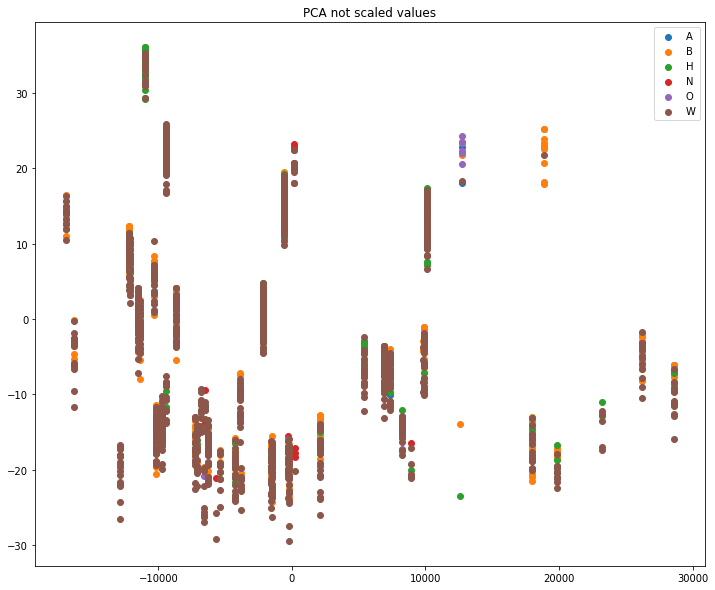

<Figure size 864x720 with 0 Axes>

In [4]:
# PCA
pca = PCA(n_components=10)
pca_values = pca.fit_transform(X)

for c in np.unique(targets):
    plt.scatter(pca_values[targets==c][:,0], pca_values[targets==c][:,1], label=c)

plt.title("PCA not scaled values")
plt.legend()
plt.savefig("pca_not_scaled.png")
plt.figure()
print(f"Explained variance sum: {pca.explained_variance_ratio_[:2].sum()}")

Explained variance sum: 0.4616859023021517


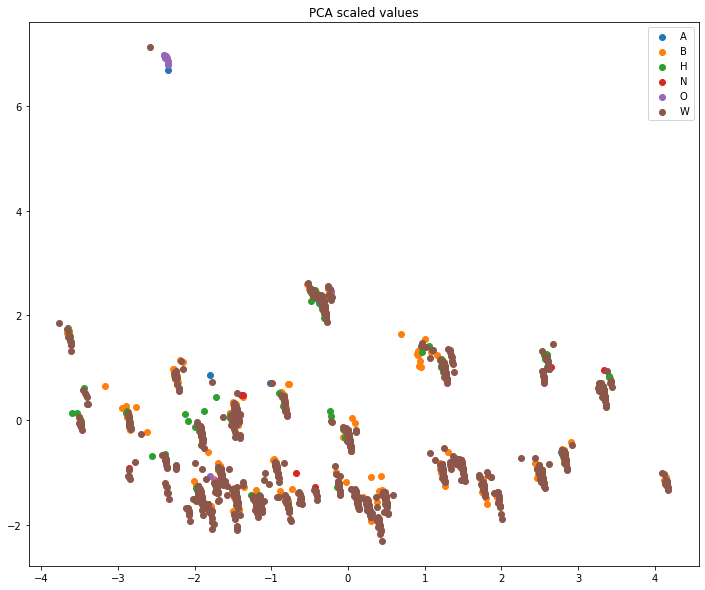

<Figure size 864x720 with 0 Axes>

In [5]:
# PCA
scaler = StandardScaler()
values = scaler.fit_transform(X)


pca = PCA(n_components=10)
pca_values = pca.fit_transform(values)

for c in np.unique(targets):
    plt.scatter(pca_values[targets==c][:,0], pca_values[targets==c][:,1], label=c)

plt.title("PCA scaled values")
plt.legend()
plt.savefig("pca_not_scaled.png")
plt.figure()
print(f"Explained variance sum: {pca.explained_variance_ratio_[:2].sum()}")

<Figure size 864x720 with 0 Axes>

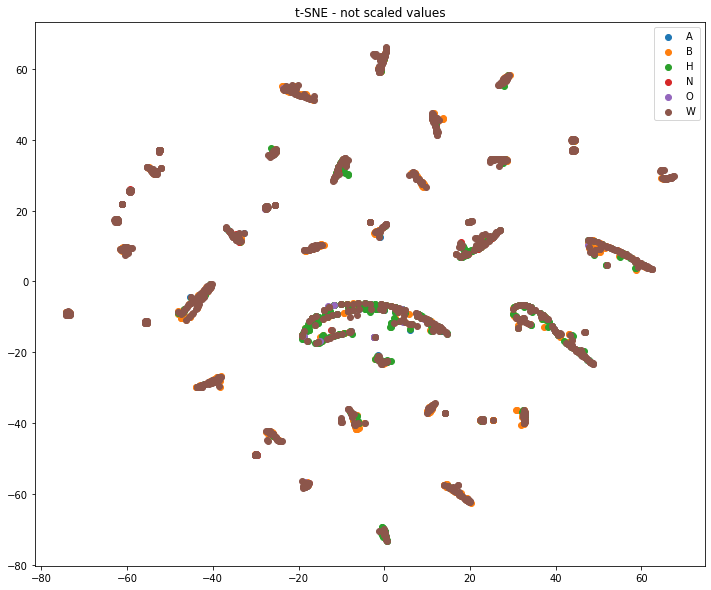

<Figure size 864x720 with 0 Axes>

In [6]:
# TSNE
tsne = TSNE(n_components=2)
tsne_values = tsne.fit_transform(X)

for c in np.unique(targets):
    plt.scatter(tsne_values[targets==c][:,0], tsne_values[targets==c][:,1], label=c)

plt.legend()
plt.title("t-SNE - not scaled values")
plt.savefig("tSNE_not_scaled.png")
plt.figure()

<Figure size 864x720 with 0 Axes>

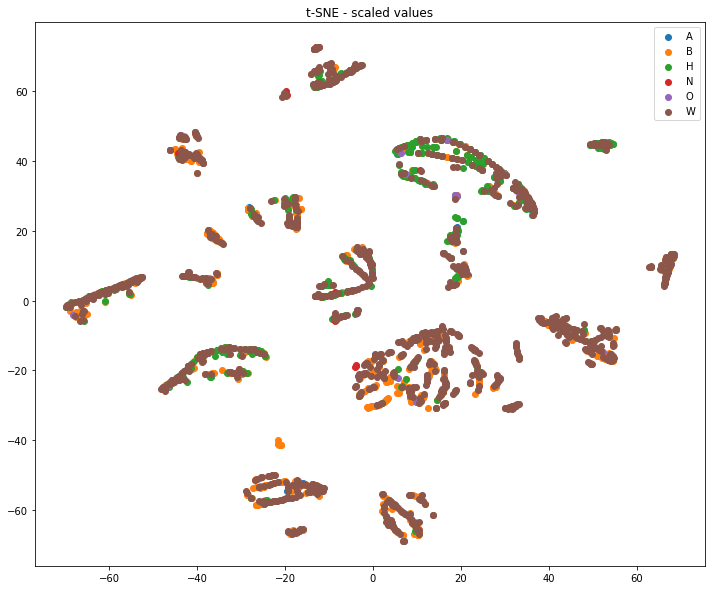

<Figure size 864x720 with 0 Axes>

In [7]:
# TSNE
values = StandardScaler().fit_transform(X)
tsne = TSNE(n_components=2)
tsne_values = tsne.fit_transform(values)

for c in np.unique(targets):
    plt.scatter(tsne_values[targets==c][:,0], tsne_values[targets==c][:,1], label=c)

plt.legend()
plt.title("t-SNE - scaled values")
plt.savefig("tSNE_not_scaled.png")
plt.figure()

In [14]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier((100,100,100),alpha=0.000001, max_iter=1000),
    AdaBoostClassifier()
]


Nearest Neighbors: 51.88
Linear SVM: 52.769999999999996
RBF SVM: 55.21
Decision Tree: 53.879999999999995
Random Forest: 51.22
Neural Net: 54.32
AdaBoost: 41.02


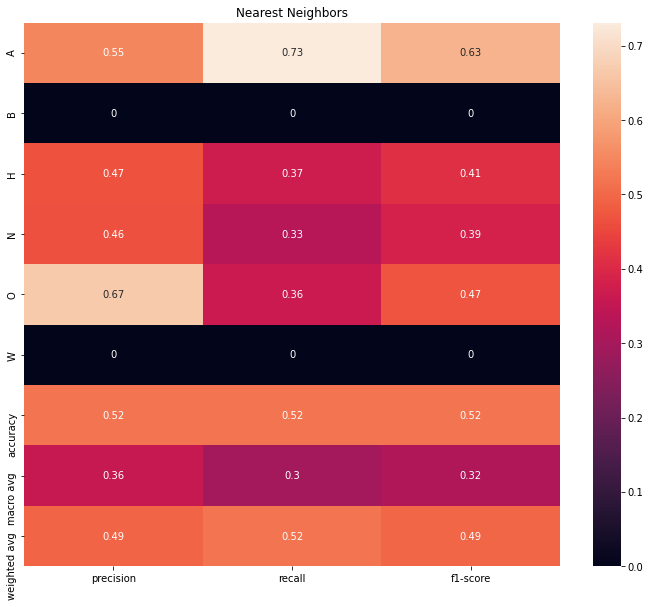

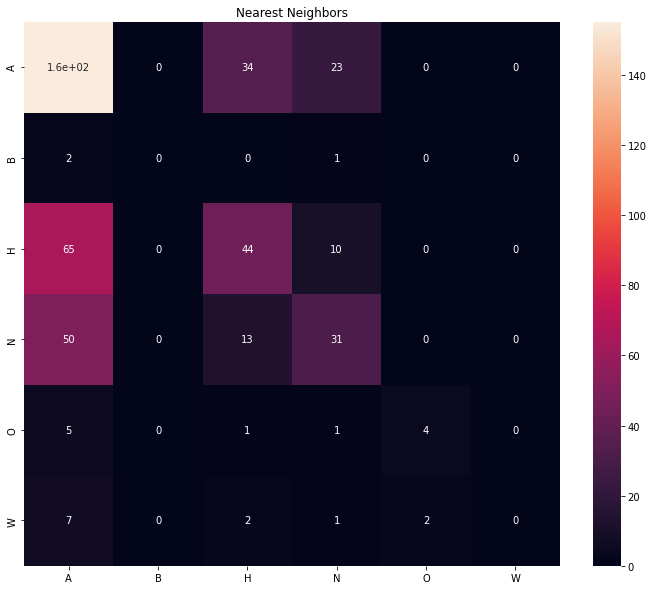

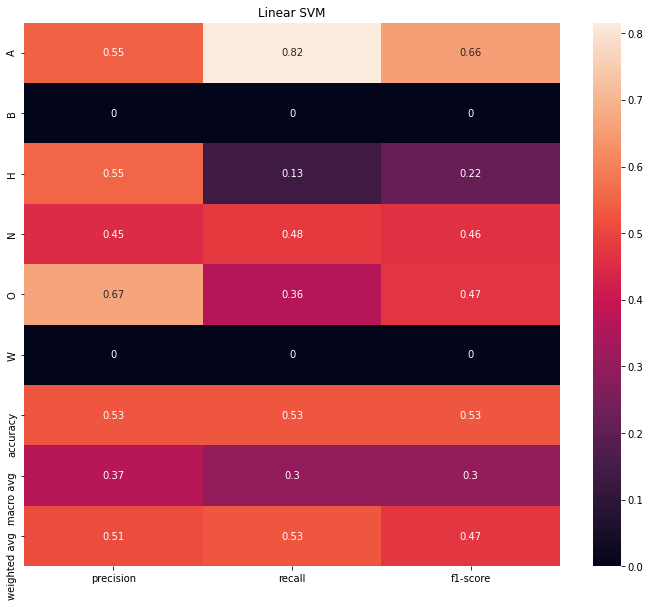

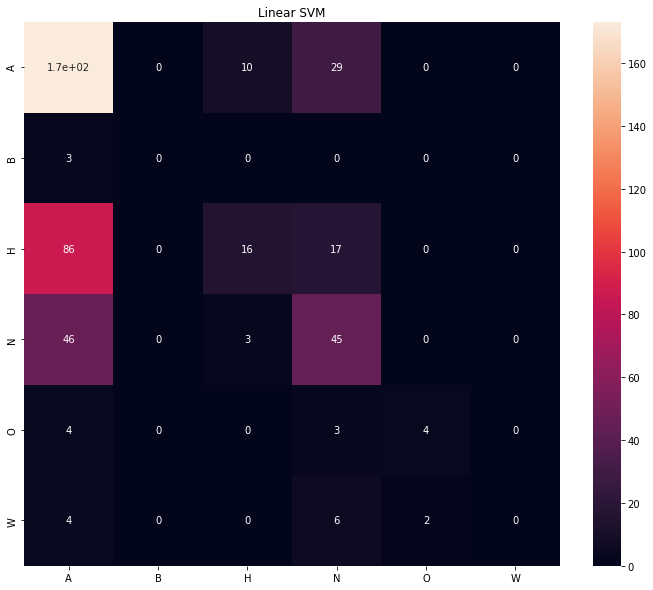

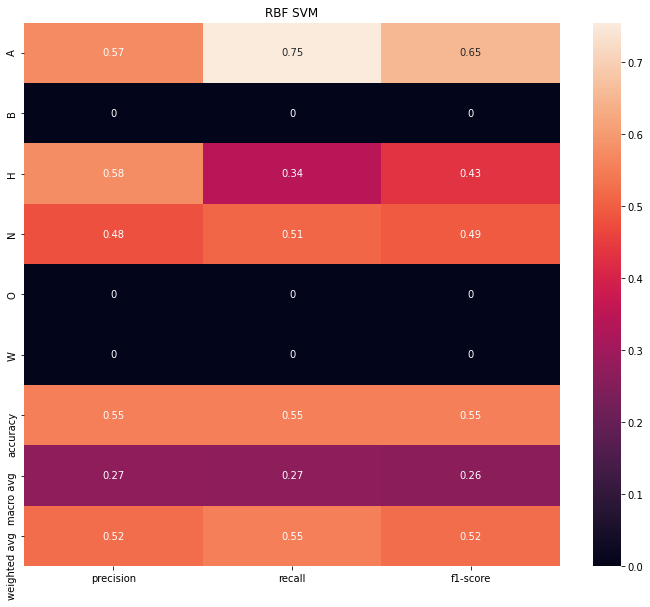

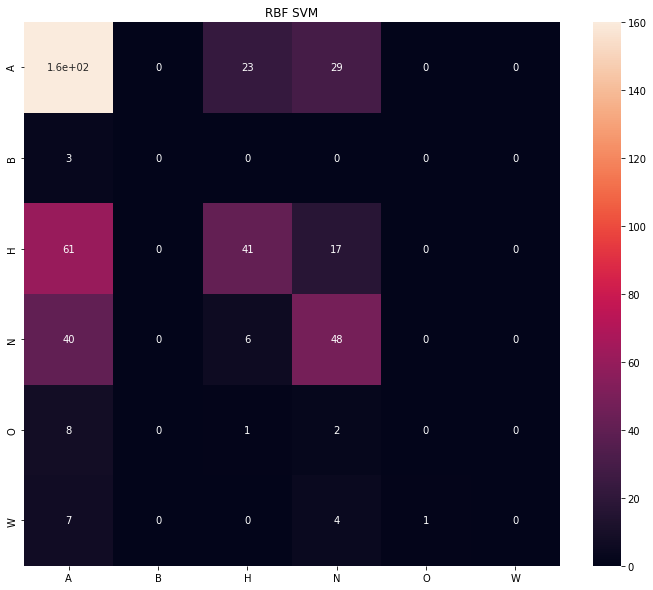

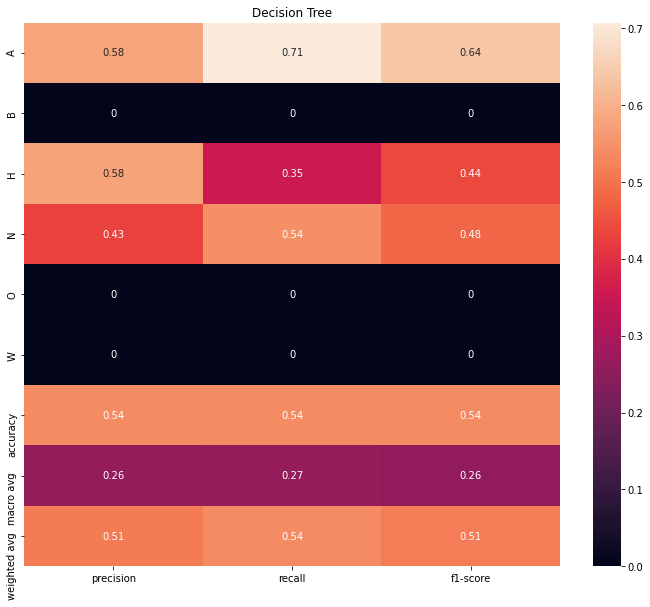

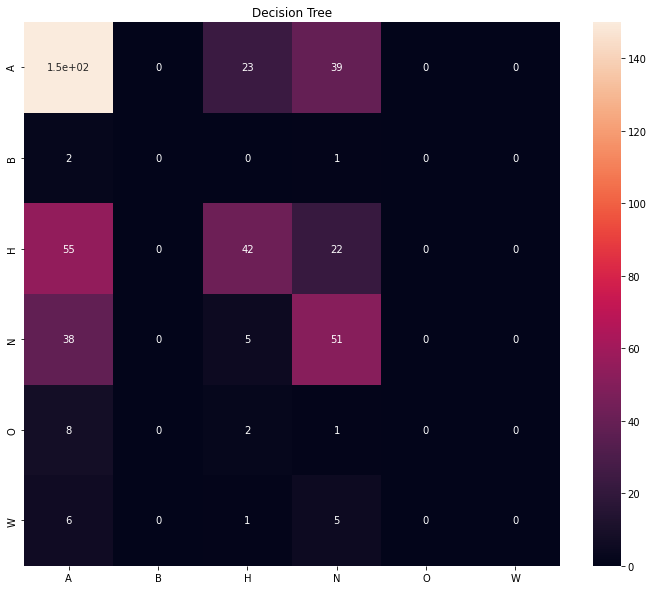

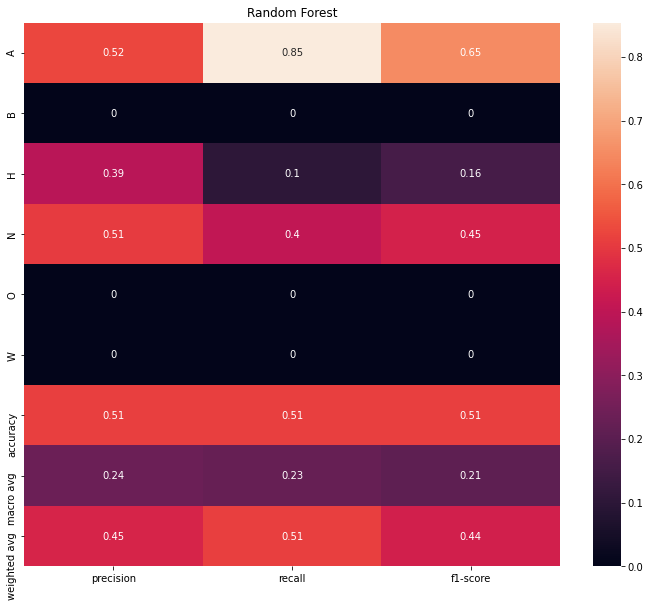

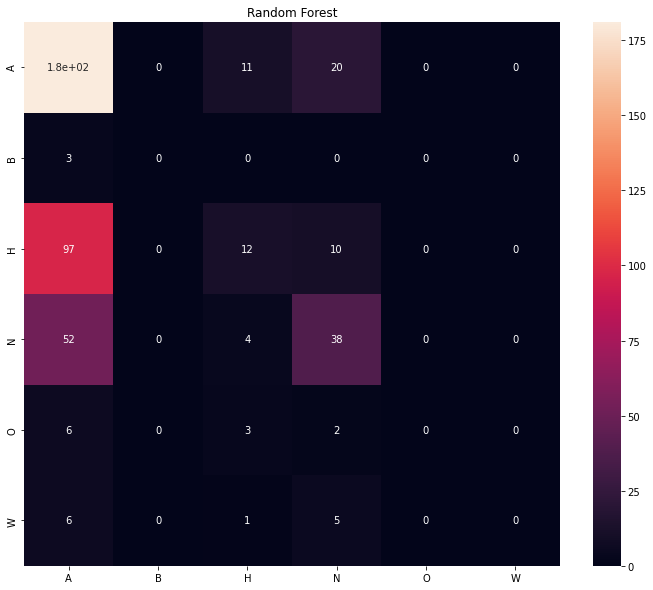

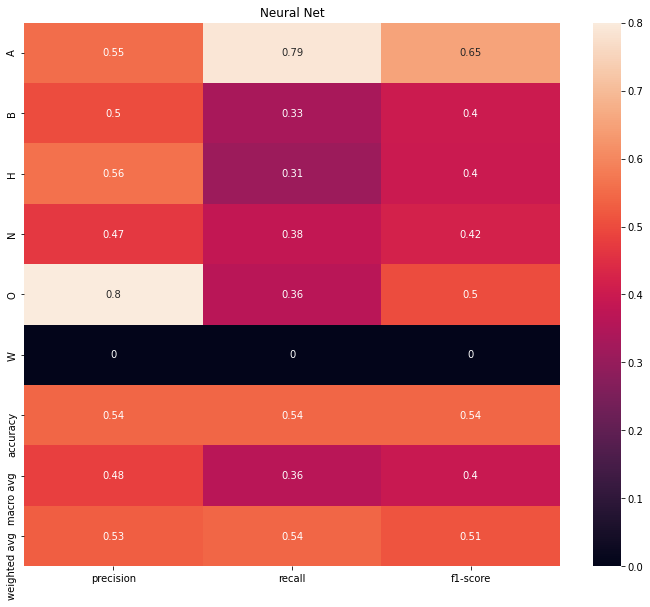

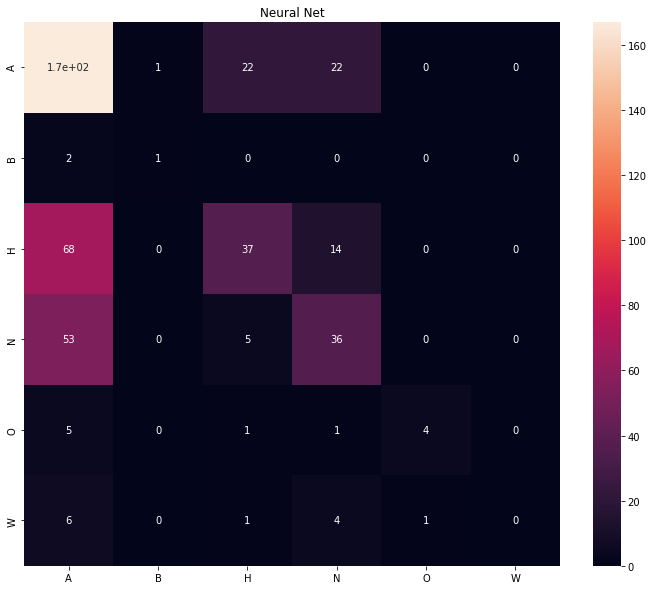

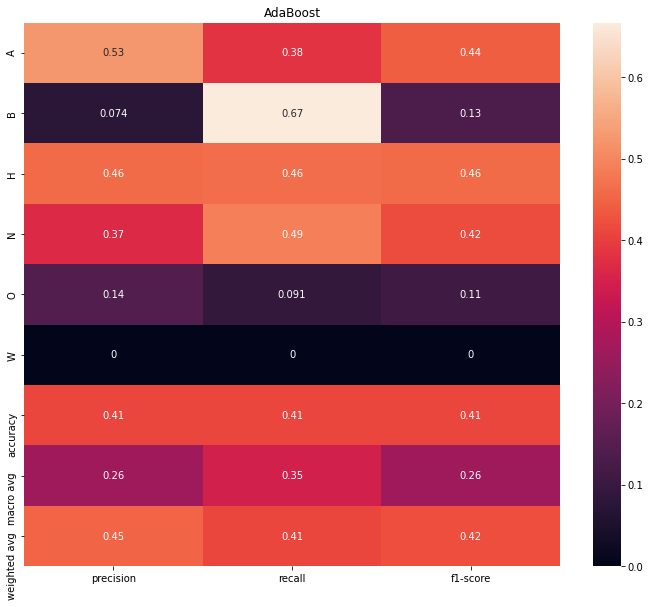

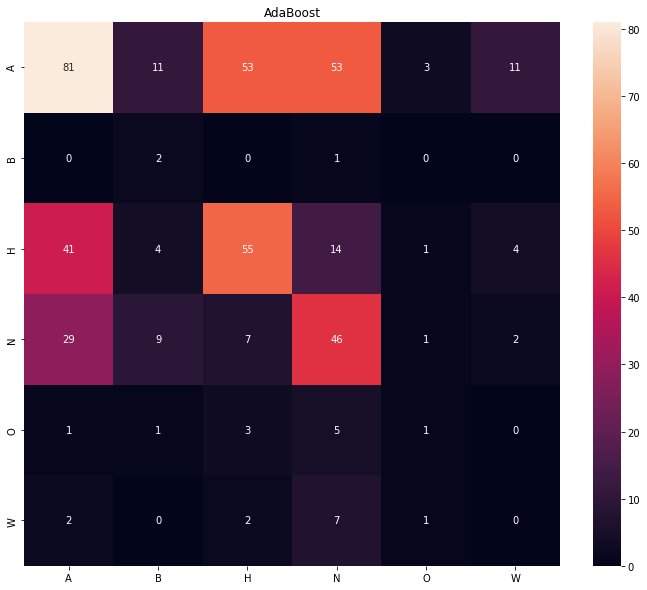

<Figure size 864x720 with 0 Axes>

In [15]:
scores = []
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=42)

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(100*round(score,4))
    print(f"{name}: {100*round(score,4)}")
    test_pred = clf.predict(X_test)
    clf_report = classification_report(y_test, test_pred,
                                    labels=np.unique(targets.map({x: i for x, i in zip(
                                        targets.unique(), range(targets.unique().shape[0]))}).to_numpy()),
                                    target_names=np.unique(targets.to_numpy()),
                                    output_dict=True)

    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.title(name)
    plt.savefig(f"{name}_report_scaled.png")
    plt.figure()
    conf_m = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, test_pred))
    conf_m.columns, conf_m.index = np.unique(targets.to_numpy()), np.unique(targets.to_numpy())
    sns.heatmap(conf_m, annot=True)
    plt.savefig(f"{name}_conf.png")
    plt.title(name)
    plt.figure()

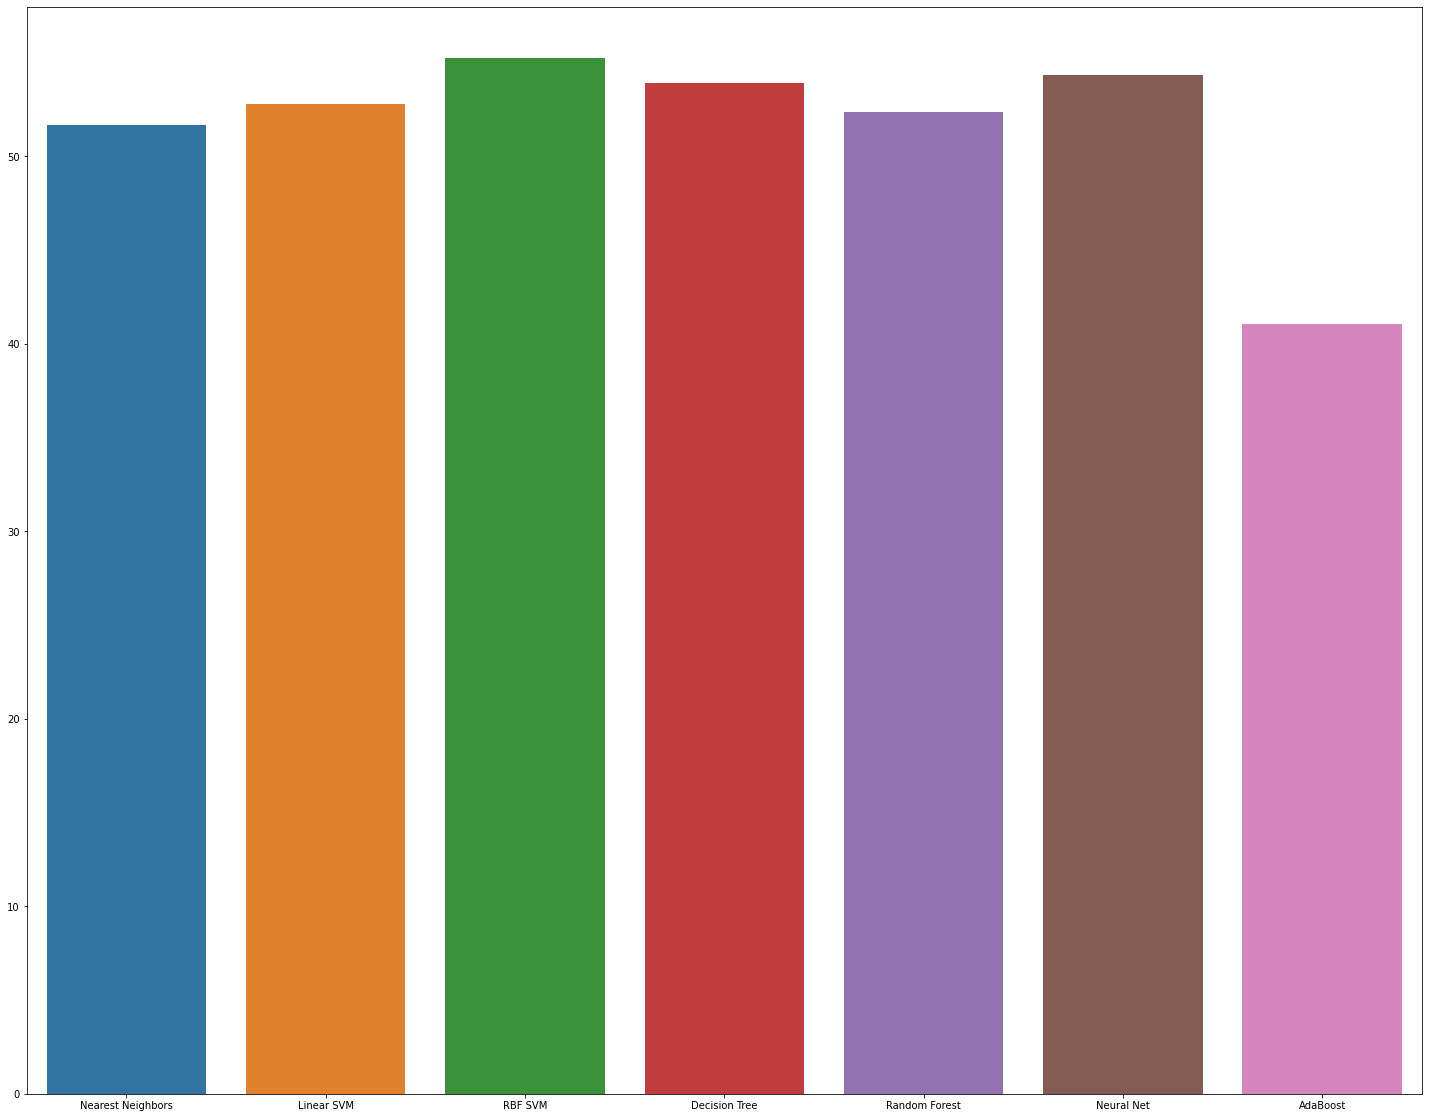

In [10]:
raw_data = {
    "x": names,
    "y": scores
}
plt.figure(figsize=(25,20))
sns.barplot(x="x", y="y", data=raw_data)
plt.savefig("precisions_data.png")